<a href="https://colab.research.google.com/github/Hasinigammune/Tweet-clustering/blob/main/Tweet_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tweet_clustering using K-means clustering (Jaccard Distance)
#Group members:
- Hasini Gammune

- Mahesh Ranpati Dewage

#Import Libraries

In [1]:
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To print the last complile time and date
import datetime
import pytz

# Flow of the Assignment 3
- We first read the .txt file containing tweets into a dataframe
- Next, we do the preprocessing
- Finally, we do the clustering


## Preprocessing Data
### we do the following steps
- Seperate the tweet id and timestamp from the tweet(when reading data into a dataframe)
- Remove any word that starts with the symbol @ e.g. @AnnaMedaris
- Remove any hashtag symbols e.g. convert #depression to depression
- Remove any URL
- Convert every word to lowercase

## Clustering
- We test k-means clustering for several k values
- We plot the Graph of SSE vs number of clusters for visualization

In [2]:
class kmeans_clustering:
  def __init__(self, dataFile):
    self.usnewshealth = dataFile

  def main_method(self):
    def clean_data(line):
      pos1=line.find('|')
      line=line[:0]+line[pos1+1:] #remove tweeet id
      pos2=line.find('|')
      line=line[:0]+line[pos2+1:] #remove date time
      pos3=line.find('http:') #remove url
      line=line[:pos3]
      line=line.lower() #covert to lower
      line=line.rstrip('\n')
      line=re.split(r'[ `!#$%^&*()_+\-=\[\]{};\:"\\|,<>\/?~]',line) #split
      line= [ x for x in line if ("@") not in x ]
      while "" in line:
       line.remove("")
      return(line)

    # Finding jacc_distance
    def jacc_distance(a,b):
       # Calculate the intersection and union sizes
      inter_size = len(set(a).intersection(set(b)))
      union_size = len(set(a).union(set(b)))

        # Calculate the Jaccard distance
      jacc_dis = 1.0 - (inter_size / union_size)

      #jacc_dis=round(1-len(inter)/(len(uni)+1),4)
      #print(jacc_dis)
      return(jacc_dis)

    # Calculate the SSE
    def SSE_cal(K,centroids, clusters,tweet_list):
      sse=0
      for k in range(K):
        for x in clusters[k]:
          d=jacc_distance(tweet_list[int(centroids[k])],tweet_list[x])
          sse=sse+d**2
      return(sse)

    #Finding the new centroid
    def find_new_centroid(K, cluster,tweet_list):
      new_i_sum=[]
      for i in cluster:
        sum=0
        for j in cluster:
          sum=sum+jacc_distance(tweet_list[i],tweet_list[j])
        new_i_sum.append([sum,i])

      if(len((new_i_sum))==0):
        new_cent=[1,1]
      else:
        new_cent=min(new_i_sum)
      return(new_cent[1])

    # K mean clustering using jaccard distance
    def kmeans_tweet(K, tweet_list, l):
      clus_sep=[]
      #initial centroids
      centroids=[x for x in range(K)]
      for k in range(K):
        clus_sep.append([])# intialize

      for j in range(l):
        dist=[]
        for k in range(K):
          d=jacc_distance(tweet_list[j],tweet_list[centroids[k]])
          dist.append([d,k])

        min_d=min(dist)
        clus_sep[min_d[1]].append(j)

        new_cent=find_new_centroid(K,clus_sep[min_d[1]],tweet_list)
        centroids[k]=new_cent

      SSE=SSE_cal(K,centroids,clus_sep,tweet_list)
      ret_list=[clus_sep,SSE]
      return(ret_list)

    Lines = self.usnewshealth.split('\n')  # Split the content into lines
    tweet_list = []
    for line in Lines:
      line=" {}".format(line.strip())
      line=clean_data(line)
      tweet_list.append(line)
    #print(tweet_list)

    K=[i for i in range(10, 101, 10)]
    l=len(tweet_list)

    sse_values = []

    for k in K:
      tweet_clus=kmeans_tweet(k, tweet_list, l)
      print("K is :",k)
      print("Size of each cluster :")
      size_clusters=[]
      for i in tweet_clus[0]:
        size_clusters.append(len(i))
      print(size_clusters)
      print("SSE :" ,tweet_clus[1])
      sse_values.append(tweet_clus[1])

    plt.plot(K, sse_values, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('SSE vs. K')
    plt.grid(True)
    plt.show()

## We use the foxnewshealth.txt dataset

In [3]:
url = 'https://drive.google.com/file/d/1B5cMrXQ5xvRHsU9ndHE3T_CmMqAA_DA0/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

# Download the file content using requests
response = requests.get(dwn_url)
if response.status_code == 200:
    usnewshealth = response.text



K is : 10
Size of each cluster :
[504, 260, 21, 49, 236, 266, 75, 323, 188, 78]
SSE : 1734.5394244541783
K is : 20
Size of each cluster :
[256, 239, 9, 37, 134, 187, 49, 141, 155, 245, 166, 83, 79, 31, 8, 14, 82, 47, 15, 23]
SSE : 1664.2318818534986
K is : 30
Size of each cluster :
[181, 174, 8, 23, 124, 157, 45, 112, 129, 223, 122, 63, 69, 26, 7, 13, 67, 38, 14, 24, 24, 18, 2, 25, 47, 70, 51, 93, 30, 21]
SSE : 1629.9358292768036
K is : 40
Size of each cluster :
[98, 163, 7, 18, 112, 127, 38, 98, 113, 184, 102, 56, 53, 12, 6, 11, 64, 36, 10, 20, 21, 18, 2, 23, 38, 55, 37, 85, 24, 29, 12, 49, 30, 9, 104, 31, 2, 60, 16, 27]
SSE : 1599.672582508298
K is : 50
Size of each cluster :
[68, 135, 7, 16, 88, 101, 27, 77, 110, 160, 91, 51, 44, 12, 6, 6, 62, 33, 10, 18, 19, 14, 2, 22, 37, 30, 31, 82, 20, 26, 11, 42, 28, 9, 94, 25, 2, 48, 15, 44, 23, 9, 50, 14, 0, 28, 74, 17, 42, 20]
SSE : 1569.45321630441
K is : 60
Size of each cluster :
[50, 123, 7, 14, 87, 97, 25, 77, 102, 155, 87, 47, 42, 12, 5

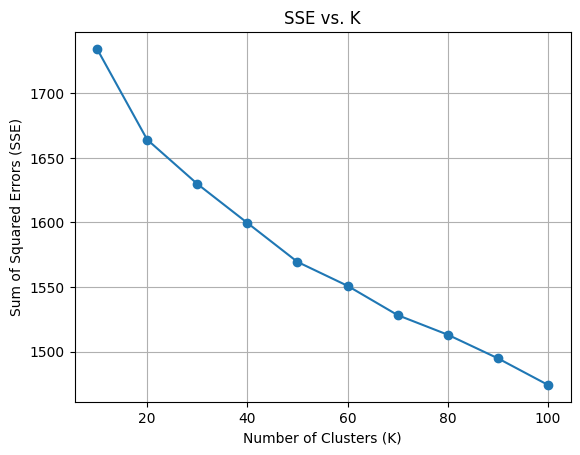

In [4]:
if __name__ == "__main__":
    kmeans = kmeans_clustering(usnewshealth) # put in path to your file
    kmeans.main_method()

- This Scree plot shows that the optimal number of clusters is 20, as the drop in SSE is low when the number of clusters is increased by more than 20.

- Butter more accuracy can be obtained by tuning K more.

# Date and Time of Last Compile

In [5]:
# Get the current date and time
timezone = pytz.timezone('US/Central')
current_datetime = datetime.datetime.now(timezone)

# Print the current date and time
print("Current date and time:", current_datetime)

Current date and time: 2023-11-25 13:09:24.180567-06:00
